In [42]:
#Uber Trip Data Analysis(intermidiate)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score


In [43]:
uber = pd.read_csv('Uberdataset.csv')
uber.head(10)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,1/6/2016 17:15,1/6/2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
6,1/6/2016 17:30,1/6/2016 17:35,Business,West Palm Beach,Palm Beach,7.1,Meeting
7,1/7/2016 13:27,1/7/2016 13:33,Business,Cary,Cary,0.8,Meeting
8,1/10/2016 8:05,1/10/2016 8:25,Business,Cary,Morrisville,8.3,Meeting
9,1/10/2016 12:17,1/10/2016 12:44,Business,Jamaica,New York,16.5,Customer Visit


In [44]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [45]:
uber.isnull().sum()

,0
START_DATE*,0
END_DATE*,1
CATEGORY*,1
START*,1
STOP*,1
MILES*,0
PURPOSE*,503


##*Data Preprocessing

In [49]:
# Drop rows where END_DATE* is missing
uber = uber.dropna(subset=['END_DATE*'])

# Convert date columns to datetime
uber['START_DATE'] = pd.to_datetime(uber['START_DATE*'])
uber['END_DATE'] = pd.to_datetime(uber['END_DATE*'])


In [50]:
# Fill missing PURPOSE values
uber['PURPOSE*'] = uber['PURPOSE*'].fillna('Unknown')

# Convert MILES* to numeric
uber['MILES*'] = pd.to_numeric(uber['MILES*'], errors='coerce')


#Feature Engineering

In [51]:
# Extract time features
uber['start_hour'] = uber['START_DATE'].dt.hour
uber['start_minute'] = uber['START_DATE'].dt.minute
uber['end_hour'] = uber['END_DATE'].dt.hour
uber['end_minute'] = uber['END_DATE'].dt.minute
uber['day_of_week'] = uber['START_DATE'].dt.day_name()
uber['month'] = uber['START_DATE'].dt.month

In [54]:

# Calculate trip duration in minutes
uber['duration_min'] = (uber['END_DATE'] - uber['START_DATE']).dt.total_seconds() / 60

# Convert MILES* to numeric
uber['MILES*'] = pd.to_numeric(uber['MILES*'], errors='coerce')

# Calculate speed in mph
uber['speed_mph'] = uber['MILES*'] / (uber['duration_min'] / 60)

# Convert day_of_week to numeric for modeling
uber['day_of_week_num'] = uber['day_of_week'].map({
    'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7
})




##**Exploratory Data Analysis(EDA)

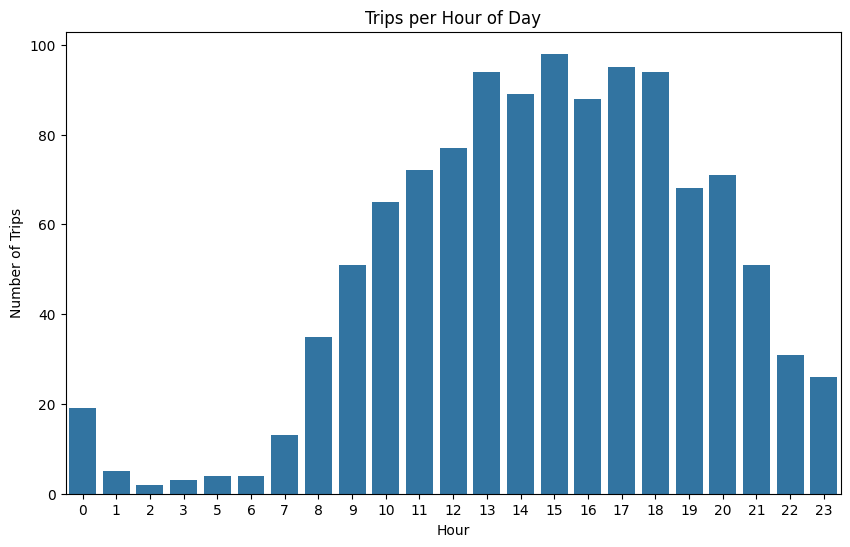

In [32]:
# 1. Trips per hour
plt.figure(figsize=(10,6))
sns.countplot(x='start_hour', data=uber)
plt.title('Trips per Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Trips')
plt.show()

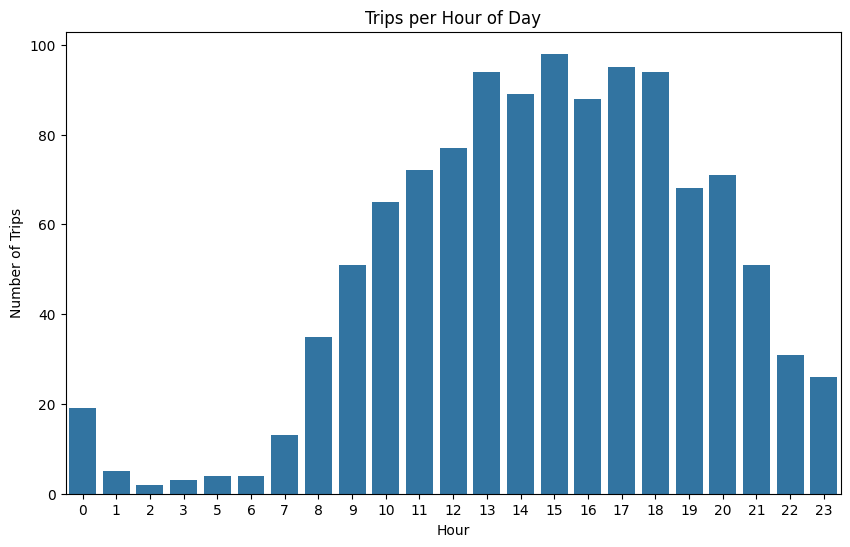

In [36]:
# 1. Trips per hour
plt.figure(figsize=(10,6))
sns.countplot(x='start_hour', data=uber)
plt.title('Trips per Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Trips')
plt.show()

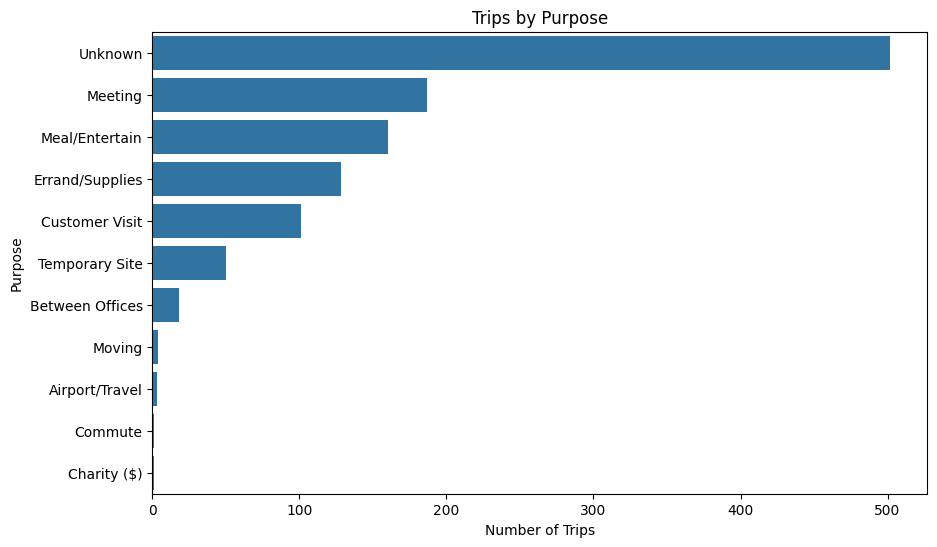

In [37]:
# 3. Trips by purpose
plt.figure(figsize=(10,6))
sns.countplot(y='PURPOSE*', data=uber, order=uber['PURPOSE*'].value_counts().index)
plt.title('Trips by Purpose')
plt.xlabel('Number of Trips')
plt.ylabel('Purpose')
plt.show()

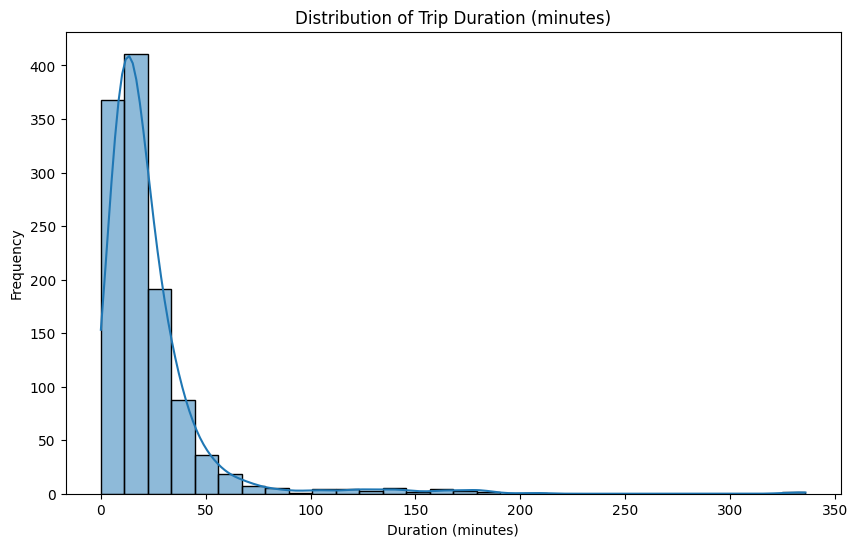

In [38]:
# 4. Distribution of trip durations
plt.figure(figsize=(10,6))
sns.histplot(uber['duration_min'], bins=30, kde=True)
plt.title('Distribution of Trip Duration (minutes)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()


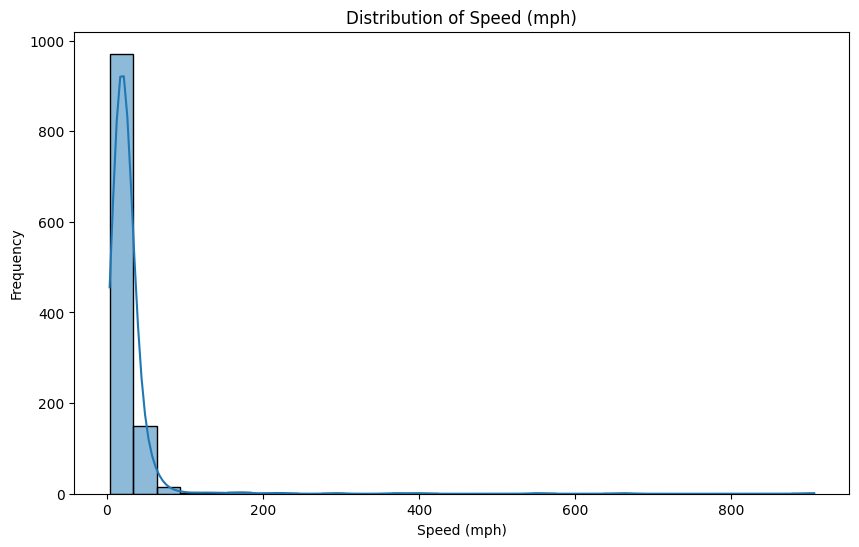

In [39]:
# 5. Distribution of speed
plt.figure(figsize=(10,6))
sns.histplot(uber['speed_mph'], bins=30, kde=True)
plt.title('Distribution of Speed (mph)')
plt.xlabel('Speed (mph)')
plt.ylabel('Frequency')
plt.show()

#**Model Building

In [57]:
# Predict trip duration using start_hour, day_of_week, and MILES
X = uber[['start_hour','day_of_week_num','MILES*']]
y = uber['duration_min']

# Split dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

#Model Evaluation

In [59]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model Evaluation:\nMean Absolute Error (MAE): {mae:.2f} minutes\nR² Score: {r2:.2f}")

Model Evaluation:
Mean Absolute Error (MAE): 9.80 minutes
R² Score: 0.50


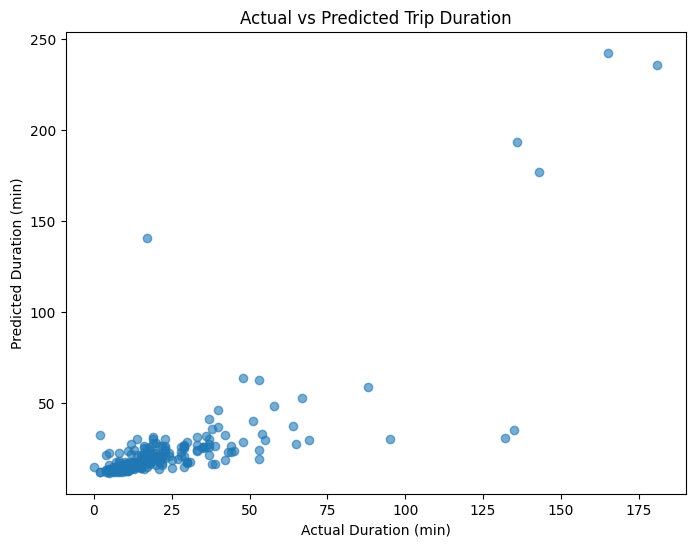

In [60]:
# Plot actual vs predicted (optional)
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel('Actual Duration (min)')
plt.ylabel('Predicted Duration (min)')
plt.title('Actual vs Predicted Trip Duration')
plt.show()


In [40]:
# Summary Statistics
print("Summary Statistics:")
print(uber.describe())

print("\nPurpose Counts:")
print(uber['PURPOSE*'].value_counts())

print("\nTrips per Category:")
print(uber['CATEGORY*'].value_counts())

Summary Statistics:
            MILES*                     START_DATE  \
count  1155.000000                           1155   
mean     10.566840  2016-07-16 23:44:33.402597376   
min       0.500000            2016-01-01 21:11:00   
25%       2.900000            2016-04-01 02:10:00   
50%       6.000000            2016-07-21 17:17:00   
75%      10.400000            2016-10-27 21:06:30   
max     310.300000            2016-12-31 22:08:00   
std      21.579106                            NaN   

                            END_DATE   start_hour  start_minute     end_hour  \
count                           1155  1155.000000   1155.000000  1155.000000   
mean   2016-07-17 00:07:47.999999744    14.696104     29.128139    14.794805   
min              2016-01-01 21:17:00     0.000000      0.000000     0.000000   
25%              2016-04-01 02:35:00    12.000000     14.000000    12.000000   
50%              2016-07-21 17:23:00    15.000000     29.000000    15.000000   
75%              2016-

Data Preprocessing – Missing values handled, unrealistic trips removed, dates converted.

Feature Engineering – Extract hour, day, month, duration, speed, numeric day of week.

EDA & Visualization – Trips per hour/day, trips by purpose, histograms.

Summary Statistics – Numeric and categorical summaries.

Model Building – Linear Regression predicting duration_min.

Model Evaluation – MAE, R², and scatter plot comparing actual vs predicted durations.